In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os, os.path
import csv
import numpy
from galpy.potential import LogarithmicHaloPotential
from galpy.orbit import Orbit
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.snapshot import nemo_util
import seaborn as sns
from galpy.util import bovy_plot, bovy_coords, bovy_conversion, multi
%pylab inline
import copy

Populating the interactive namespace from numpy and matplotlib


# Analysis of the NEMO snapshots of impacts of a GC stream with a DM stream

##Just before the impact

We introduce the DM stream 0.125 NEMO time units (~120 Myr) before the point of closest approach. This is what the DM snapshots look like then, compared to where the GC stream is at the time of impact (thus, the two streams are not shown at the same time here). We also show the orbit that the DM will take.

In [3]:
# GC
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gc_evol_unp.dat')
snap_gc= nemo_util.read(filename,swapyz=True)
# Various DM streams
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'dm_evol_0.50_untilimpact.dat')
snap_dm0p5= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'dm_evol_0.25_untilimpact.dat')
snap_dm0p25= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'dm_evol_0.375_untilimpact.dat')
snap_dm0p375= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'dm_evol_0.125_untilimpact.dat')
snap_dm0p125= nemo_util.read(filename,swapyz=True)

In [4]:
# Orbit of the DM
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
R0, V0= 8., 220.
def rectangular_to_cylindrical(xv):
    R,phi,Z= bovy_coords.rect_to_cyl(xv[:,0],xv[:,1],xv[:,2])
    vR,vT,vZ= bovy_coords.rect_to_cyl_vec(xv[:,3],xv[:,4],xv[:,5],R,phi,Z,cyl=True)
    out= numpy.empty_like(xv)
    # Preferred galpy arrangement of cylindrical coordinates
    out[:,0]= R
    out[:,1]= vR
    out[:,2]= vT
    out[:,3]= Z
    out[:,4]= vZ
    out[:,5]= phi
    return out
# DM at the time of impact
xv_dm_impact= numpy.array([-13.500000,2.840000,-1.840000,6.82200571,132.7700529,149.4174464])
RvR_dm_impact= rectangular_to_cylindrical(xv_dm_impact[:,numpy.newaxis].T)[0,:]
dm_impact= Orbit([RvR_dm_impact[0]/R0,RvR_dm_impact[1]/V0,RvR_dm_impact[2]/V0,
                  RvR_dm_impact[3]/R0,RvR_dm_impact[4]/V0,RvR_dm_impact[5]],ro=R0,vo=V0)
dm_impact= dm_impact.flip()
# Integrate to 0.125 time units earlier
times= numpy.linspace(0.,0.125*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),1001)
dm_impact.integrate(times,lp)
dm_forward= dm_impact(times[-1]).flip()
times= numpy.linspace(0.,0.250*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),1001)
dm_forward.integrate(times,lp)

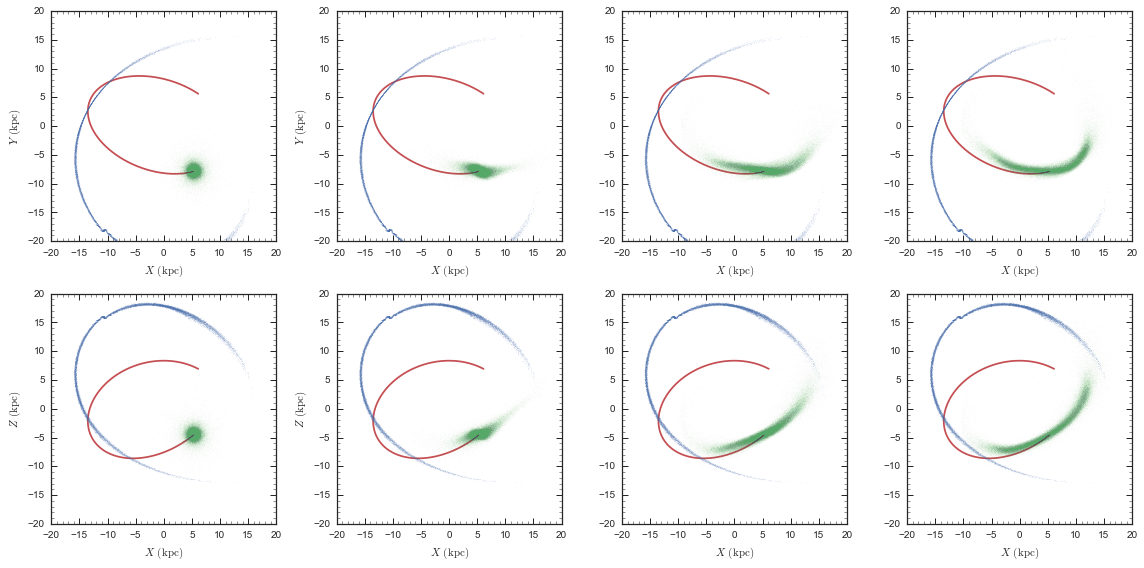

In [5]:
figsize(16,8)
subplot(2,4,1)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,2,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Y\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p125[:,1,-1],snap_dm0p125[:,2,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='y',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,2)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,2,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Y\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p25[:,1,-1],snap_dm0p25[:,2,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='y',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,3)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,2,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p375[:,1,-1],snap_dm0p375[:,2,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='y',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,4)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,2,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p5[:,1,-1],snap_dm0p5[:,2,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='y',overplot=True,color=sns.color_palette()[2],zorder=0)
tight_layout()
subplot(2,4,5)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,3,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p125[:,1,-1],snap_dm0p125[:,3,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,6)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,3,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p25[:,1,-1],snap_dm0p25[:,3,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,7)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,3,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p375[:,1,-1],snap_dm0p375[:,3,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,8)
bovy_plot.bovy_plot(snap_gc[:,1,-5],snap_gc[:,3,-5],',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p5[:,1,-1],snap_dm0p5[:,3,-1],',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
tight_layout()

## After impact

Here is what the streams looks like after the impact:

In [6]:
# Snapshots are now combined, read various DM streams
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gcdm_evol_0.50_afterimpact.dat')
snap_dm0p5_after= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gcdm_evol_0.375_afterimpact.dat')
snap_dm0p375_after= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gcdm_evol_0.25_afterimpact.dat')
snap_dm0p25_after= nemo_util.read(filename,swapyz=True)
filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                       'gcdm_evol_0.125_afterimpact.dat')
snap_dm0p125_after= nemo_util.read(filename,swapyz=True)

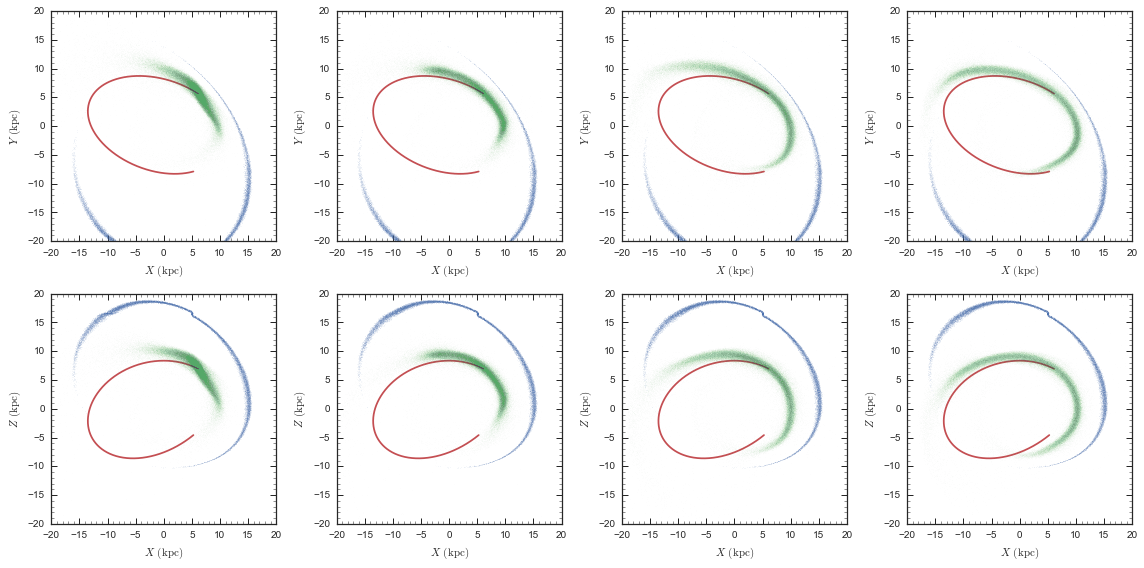

In [7]:
figsize(16,8)
subplot(2,4,1)
bovy_plot.bovy_plot(snap_dm0p125_after[:100000,1,-1],
                    snap_dm0p125_after[:100000,2,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Y\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p125_after[100000:,1,-1],snap_dm0p125_after[100000:,2,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='y',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,2)
bovy_plot.bovy_plot(snap_dm0p25_after[:100000,1,-1],
                    snap_dm0p25_after[:100000,2,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Y\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p25_after[100000:,1,-1],snap_dm0p25_after[100000:,2,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='y',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,3)
bovy_plot.bovy_plot(snap_dm0p375_after[:100000,1,-1],
                    snap_dm0p375_after[:100000,2,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Y\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p375_after[100000:,1,-1],snap_dm0p375_after[100000:,2,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='y',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,4)
bovy_plot.bovy_plot(snap_dm0p5_after[:100000,1,-1],
                    snap_dm0p5_after[:100000,2,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Y\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p5_after[100000:,1,-1],snap_dm0p5_after[100000:,2,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='y',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,5)
bovy_plot.bovy_plot(snap_dm0p125_after[:100000,1,-1],
                    snap_dm0p125_after[:100000,3,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p125_after[100000:,1,-1],snap_dm0p125_after[100000:,3,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,6)
bovy_plot.bovy_plot(snap_dm0p25_after[:100000,1,-1],
                    snap_dm0p25_after[:100000,3,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p25_after[100000:,1,-1],snap_dm0p25_after[100000:,3,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,7)
bovy_plot.bovy_plot(snap_dm0p375_after[:100000,1,-1],
                    snap_dm0p375_after[:100000,3,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p375_after[100000:,1,-1],snap_dm0p375_after[100000:,3,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
subplot(2,4,8)
bovy_plot.bovy_plot(snap_dm0p5_after[:100000,1,-1],
                    snap_dm0p5_after[:100000,3,-1],
                    ',',alpha=0.05,
                    color=sns.color_palette()[0],zorder=1,
                    xrange=[-20.,20.],yrange=[-20.,20],
                    xlabel=r'$X\,(\mathrm{kpc})$',
                    ylabel=r'$Z\,(\mathrm{kpc})$',
                    gcf=True)
plot(snap_dm0p5_after[100000:,1,-1],snap_dm0p5_after[100000:,3,-1],
     ',',alpha=0.01,color=sns.color_palette()[1],zorder=2)
dm_forward.plot(d1='x',d2='z',overplot=True,color=sns.color_palette()[2],zorder=0)
tight_layout()

## Action-angle coordinates for the stream

In this section, we compute the action-angle coordinates for all of the particles in the unperturbed stream at the time of impact to aid in the analysis. The distribution of radial frequency vs. parallel angle is:

In [241]:
aa_filename= os.path.join(os.getenv('DATADIR'),'bovy','stream-stream',
                         'gc_evol_unp_aa.dat')
# Cylindrical coordinates for everything
RvR= rectangular_to_cylindrical(snap_gc[:,1:,-5])
def calc_aA_sim(RvR,filename):
    # Calculate the action angle variables for a simulation and store
    if not os.path.exists(aa_filename):
        aAI= actionAngleIsochroneApprox(pot=lp,b=0.8)
        nbatch= 20
        multiOut= multi.parallel_map(\
            lambda x: aAI.actionsFreqsAngles(RvR[x*nbatch:(x+1)*nbatch,0]/R0,
                                             RvR[x*nbatch:(x+1)*nbatch,1]/V0,
                                             RvR[x*nbatch:(x+1)*nbatch,2]/V0,
                                             RvR[x*nbatch:(x+1)*nbatch,3]/R0,
                                             RvR[x*nbatch:(x+1)*nbatch,4]/V0,
                                             RvR[x*nbatch:(x+1)*nbatch,5]),
            range(len(snap_gc)//nbatch),
            numcores=25)
        acfs= numpy.reshape(numpy.swapaxes(numpy.array(multiOut),0,1),
                            (9,numpy.prod(numpy.array(multiOut).shape)//9))
        # Write to file
        csvfile= open(aa_filename,'w')
        writer= csv.writer(csvfile,delimiter=',')
        for jj in range(len(acfs[0])):
            writer.writerow([acfs[0][jj],acfs[1][jj],acfs[2][jj],
                                     acfs[3][jj],acfs[4][jj],acfs[5][jj],
                                     acfs[6][jj],acfs[7][jj],acfs[8][jj]])
            csvfile.flush()
        csvfile.close()
    else:
        acfs= numpy.loadtxt(aa_filename,delimiter=',').T
    return acfs
acfs= calc_aA_sim(RvR,aa_filename)

In [70]:
def calc_apar(acfs,angle=None,freq=False):
    # Calculate the parallel angle offset, 
    # of angle if set (otherwise of the entire simulation), 
    # angle is a frequency if freq
    thetar= acfs[6]
    thetap= acfs[7]
    thetaz= acfs[8]
    if not angle is None:
        if not freq:
            angle[0]= (numpy.pi+(angle[0]-numpy.median(thetar))) % (2.*numpy.pi)
            angle[1]= (numpy.pi+(angle[1]-numpy.median(thetap))) % (2.*numpy.pi)
            angle[2]= (numpy.pi+(angle[2]-numpy.median(thetaz))) % (2.*numpy.pi)
    thetap= (numpy.pi+(thetap-numpy.median(thetap))) % (2.*numpy.pi)
    debrisIndx= numpy.fabs(thetap-numpy.pi) > (6.*numpy.median(numpy.fabs(thetap-numpy.median(thetap))))
    if angle is None:
        thetar= (numpy.pi+(thetar-numpy.median(thetar))) % (2.*numpy.pi)
        thetaz= (numpy.pi+(thetaz-numpy.median(thetaz))) % (2.*numpy.pi)
        #center around 0 (instead of pi)
        thetar-= numpy.pi
        thetap-= numpy.pi
        thetaz-= numpy.pi
    elif freq:
        thetar= angle[0]
        thetap= angle[1]
        thetaz= angle[2]
    else:
        thetar= angle[0]-numpy.pi
        thetap= angle[1]-numpy.pi
        thetaz= angle[2]-numpy.pi
    #Frequencies
    Or= acfs[3]
    Op= acfs[4]
    Oz= acfs[5]
    dOr= Or[debrisIndx]-numpy.median(Or)
    dOp= Op[debrisIndx]-numpy.median(Op)
    dOz= Oz[debrisIndx]-numpy.median(Oz)
    dO= numpy.vstack((dOr,dOp,dOz))
    dO4dir= copy.copy(dO)
    dO4dir[:,dO4dir[0] < 0.]*= -1.
    dOdir= numpy.median(dO4dir,axis=1)
    dOdir/= numpy.sqrt(numpy.sum(dOdir**2.))
    #parallel angle
    dangle= numpy.vstack((thetar,thetap,thetaz))
    return numpy.dot(dangle.T,dOdir)
apar= calc_apar(acfs)

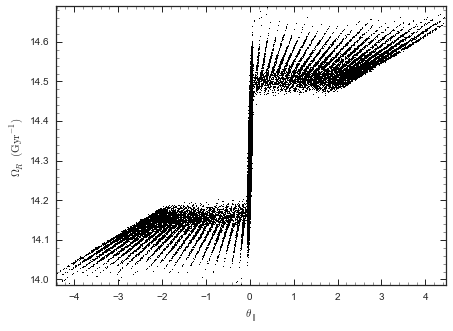

In [71]:
figsize(7,5)
bovy_plot.bovy_plot(apar,
                    acfs[3]*bovy_conversion.freq_in_Gyr(V0,R0),'k,',
                    xlabel=r'$\theta_\parallel$',
                    ylabel=r'$\Omega_R\,(\mathrm{Gyr}^{-1})$')

## Action angle coordinates for the DM streams

In [242]:
aa_filenames= [os.path.join(os.getenv('DATADIR'),
                            'bovy','stream-stream',fname)
               for fname in ['dm_evol_0.125_untilimpact_aa.dat',
                             'dm_evol_0.25_untilimpact_aa.dat',
                             'dm_evol_0.375_untilimpact_aa.dat',
                             'dm_evol_0.50_untilimpact_aa.dat',
                             'gcdm_evol_0.125_afterimpact_aa.dat',
                             'gcdm_evol_0.25_afterimpact_aa.dat',
                             'gcdm_evol_0.375_afterimpact_aa.dat',
                             'gcdm_evol_0.50_afterimpact_aa.dat']]
RvRs= [rectangular_to_cylindrical(snap[:,1:,-1])
      for snap in [snap_dm0p125,snap_dm0p25,
                   snap_dm0p375,snap_dm0p5]]
RvRs.extend([rectangular_to_cylindrical(snap[100000:,1:,-1])
      for snap in [snap_dm0p125_after,snap_dm0p25_after,
                   snap_dm0p375_after,snap_dm0p5_after]])
for aa_filename, RvR in zip(aa_filenames,RvRs):
    dum= calc_aA_sim(RvR,aa_filename)

## Kicks

In [13]:
# Stream particles within X kpc from the impact, to limit
# the amount of orbit integration
indx= numpy.sqrt((snap_gc[:,1,-5]+13.500000)**2.\
                 +(snap_gc[:,2,-5]+1.840000)**2.\
                 +(snap_gc[:,3,-5]-2.840000)**2.) < 20.
# times for orbit integration
times= numpy.linspace(0.,0.125*0.9777922212082034/bovy_conversion.time_in_Gyr(V0,R0),101)
snapvdiff_dm0p125= numpy.zeros((len(snap_gc),3))
snapvdiff_dm0p25= numpy.zeros((len(snap_gc),3))
snapvdiff_dm0p375= numpy.zeros((len(snap_gc),3))
snapvdiff_dm0p5= numpy.zeros((len(snap_gc),3))
check_zeropoint= False
if check_zeropoint:
    snapvdiff_zeropoint= numpy.zeros((len(snap_gc),3))
for ii in range(len(snap_gc)):
    if not indx[ii]: continue
    # Integrate backwards to the impact
    RvR= rectangular_to_cylindrical(snap_dm0p125_after[ii,1:,-1][:,numpy.newaxis].T)[0,:]
    orb= Orbit([RvR[0]/R0,RvR[1]/V0,RvR[2]/V0,
                RvR[3]/R0,RvR[4]/V0,RvR[5]],ro=R0,vo=V0).flip()
    orb.integrate(times,lp)
    snapvdiff_dm0p125[ii,0]= -orb.vx(times[-1])-snap_gc[ii,4,-5]
    snapvdiff_dm0p125[ii,1]= -orb.vy(times[-1])-snap_gc[ii,5,-5]
    snapvdiff_dm0p125[ii,2]= -orb.vz(times[-1])-snap_gc[ii,6,-5]
    # Integrate backwards to the impact
    RvR= rectangular_to_cylindrical(snap_dm0p25_after[ii,1:,-1][:,numpy.newaxis].T)[0,:]
    orb= Orbit([RvR[0]/R0,RvR[1]/V0,RvR[2]/V0,
                RvR[3]/R0,RvR[4]/V0,RvR[5]],ro=R0,vo=V0).flip()
    orb.integrate(times,lp)
    snapvdiff_dm0p25[ii,0]= -orb.vx(times[-1])-snap_gc[ii,4,-5]
    snapvdiff_dm0p25[ii,1]= -orb.vy(times[-1])-snap_gc[ii,5,-5]
    snapvdiff_dm0p25[ii,2]= -orb.vz(times[-1])-snap_gc[ii,6,-5]
    # Integrate backwards to the impact
    RvR= rectangular_to_cylindrical(snap_dm0p375_after[ii,1:,-1][:,numpy.newaxis].T)[0,:]
    orb= Orbit([RvR[0]/R0,RvR[1]/V0,RvR[2]/V0,
                RvR[3]/R0,RvR[4]/V0,RvR[5]],ro=R0,vo=V0).flip()
    orb.integrate(times,lp)
    snapvdiff_dm0p375[ii,0]= -orb.vx(times[-1])-snap_gc[ii,4,-5]
    snapvdiff_dm0p375[ii,1]= -orb.vy(times[-1])-snap_gc[ii,5,-5]
    snapvdiff_dm0p375[ii,2]= -orb.vz(times[-1])-snap_gc[ii,6,-5]
    # Integrate backwards to the impact
    RvR= rectangular_to_cylindrical(snap_dm0p5_after[ii,1:,-1][:,numpy.newaxis].T)[0,:]
    orb= Orbit([RvR[0]/R0,RvR[1]/V0,RvR[2]/V0,
                RvR[3]/R0,RvR[4]/V0,RvR[5]],ro=R0,vo=V0).flip()
    orb.integrate(times,lp)
    snapvdiff_dm0p5[ii,0]= -orb.vx(times[-1])-snap_gc[ii,4,-5]
    snapvdiff_dm0p5[ii,1]= -orb.vy(times[-1])-snap_gc[ii,5,-5]
    snapvdiff_dm0p5[ii,2]= -orb.vz(times[-1])-snap_gc[ii,6,-5]
    if check_zeropoint:
        # Integrate the unperturbed stream backwards to the impact, to check the zeropoint of dv
        RvR= rectangular_to_cylindrical(snap_gc[ii,1:,-4][:,numpy.newaxis].T)[0,:]
        orb= Orbit([RvR[0]/R0,RvR[1]/V0,RvR[2]/V0,
                    RvR[3]/R0,RvR[4]/V0,RvR[5]],ro=R0,vo=V0).flip()
        orb.integrate(times,lp)
        snapvdiff_zeropoint[ii,0]= -orb.vx(times[-1])-snap_gc[ii,4,-5]
        snapvdiff_zeropoint[ii,1]= -orb.vy(times[-1])-snap_gc[ii,5,-5]
        snapvdiff_zeropoint[ii,2]= -orb.vz(times[-1])-snap_gc[ii,6,-5]

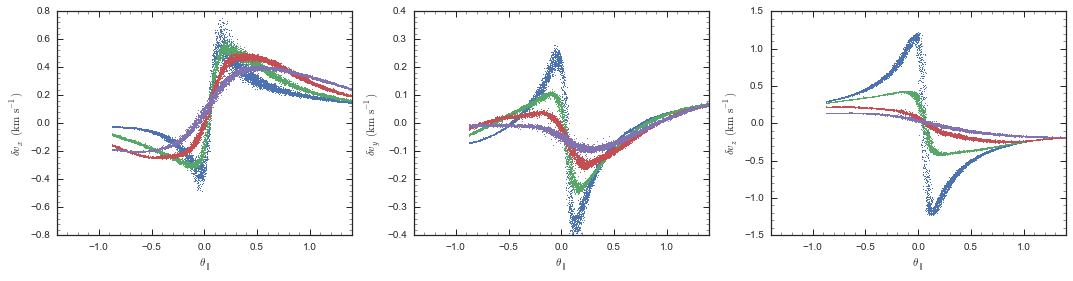

In [14]:
figsize(15,4)
subplot(1,3,1)
bovy_plot.bovy_plot(apar[indx]+2.4,
                    snapvdiff_dm0p125[indx,0],
                    ',',color=sns.color_palette()[0],
                    xrange=[-1.4,1.4],
                    yrange=[-.8,.8],
                    gcf=True,
                    xlabel=r'$\theta_\parallel$',
                    ylabel=r'$\delta v_x\,(\mathrm{km\,s}^{-1})$')
plot(apar[indx]+2.4,snapvdiff_dm0p25[indx,0],',',color=sns.color_palette()[1])
plot(apar[indx]+2.4,snapvdiff_dm0p375[indx,0],',',color=sns.color_palette()[2])
plot(apar[indx]+2.4,snapvdiff_dm0p5[indx,0],',',color=sns.color_palette()[3])
if check_zeropoint:
    plot(apar[indx]+2.4,snapvdiff_zeropoint[indx,0],',',color='k')
subplot(1,3,2)
bovy_plot.bovy_plot(apar[indx]+2.4,
                    snapvdiff_dm0p125[indx,1],
                    ',',color=sns.color_palette()[0],
                    xrange=[-1.4,1.4],
                    yrange=[-.4,.4],
                    gcf=True,
                    xlabel=r'$\theta_\parallel$',
                    ylabel=r'$\delta v_y\,(\mathrm{km\,s}^{-1})$')
plot(apar[indx]+2.4,snapvdiff_dm0p25[indx,1],',',color=sns.color_palette()[1])
plot(apar[indx]+2.4,snapvdiff_dm0p375[indx,1],',',color=sns.color_palette()[2])
plot(apar[indx]+2.4,snapvdiff_dm0p5[indx,1],',',color=sns.color_palette()[3])
if check_zeropoint:
    plot(apar[indx]+2.4,snapvdiff_zeropoint[indx,1],',',color='k')
subplot(1,3,3)
bovy_plot.bovy_plot(apar[indx]+2.4,
                    snapvdiff_dm0p125[indx,2],
                    ',',color=sns.color_palette()[0],
                    xrange=[-1.4,1.4],
                    yrange=[-1.5,1.5],
                    gcf=True,
                    xlabel=r'$\theta_\parallel$',
                    ylabel=r'$\delta v_z\,(\mathrm{km\,s}^{-1})$')
plot(apar[indx]+2.4,snapvdiff_dm0p25[indx,2],',',color=sns.color_palette()[1])
plot(apar[indx]+2.4,snapvdiff_dm0p375[indx,2],',',color=sns.color_palette()[2])
plot(apar[indx]+2.4,snapvdiff_dm0p5[indx,2],',',color=sns.color_palette()[3])
if check_zeropoint:
    plot(apar[indx]+2.4,snapvdiff_zeropoint[indx,2],',',color='k')
tight_layout()

## Calculating the kicks analytically in the impulse approximation

In [72]:
# First we get the action-angle coordinates for the cluster orbit (approximating the cluster stream as an orbit)
close_to_impact_indx= numpy.fabs(apar+2.4) < 0.2
stream_orbit_RvR= rectangular_to_cylindrical(\
    numpy.median(snap_gc[close_to_impact_indx,1:,-5],axis=0)[:,numpy.newaxis].T)[0,:]
stream_orbit= Orbit([stream_orbit_RvR[0]/R0,stream_orbit_RvR[1]/V0,stream_orbit_RvR[2]/V0,
                    stream_orbit_RvR[3]/R0,stream_orbit_RvR[4]/V0,stream_orbit_RvR[5]])
aAI= actionAngleIsochroneApprox(pot=lp,b=0.8)
stream_orbit_aA= aAI.actionsFreqsAngles(stream_orbit)
impact_apar= calc_apar(acfs,list(stream_orbit_aA[6:]))
impact_Opar= calc_apar(acfs,list(stream_orbit_aA[3:6]),freq=True)

In [207]:
# Now we integrate this cluster orbit back and forth to build position and velocity of the track
times= numpy.linspace(0.,0.1/bovy_conversion.time_in_Gyr(V0,R0),61)
stream_orbit.integrate(times,lp)
stream_orbit_back= stream_orbit.flip()
stream_orbit_back.integrate(times,lp)
x_gc= numpy.zeros((len(times)*2-1,3))
v_gc= numpy.zeros((len(times)*2-1,3))
t_gc= numpy.zeros((len(times)*2-1))
apar_gc= numpy.zeros((len(times)*2-1))
x_gc[len(times)-1:,0]= stream_orbit.x(times)
x_gc[len(times)-1:,1]= stream_orbit.y(times)
x_gc[len(times)-1:,2]= stream_orbit.z(times)
x_gc[:len(times)-1,0]= stream_orbit_back.x(times[1:][::-1])
x_gc[:len(times)-1,1]= stream_orbit_back.y(times[1:][::-1])
x_gc[:len(times)-1,2]= stream_orbit_back.z(times[1:][::-1])
v_gc[len(times)-1:,0]= stream_orbit.vx(times)
v_gc[len(times)-1:,1]= stream_orbit.vy(times)
v_gc[len(times)-1:,2]= stream_orbit.vz(times)
v_gc[:len(times)-1,0]= -stream_orbit_back.vx(times[1:][::-1])
v_gc[:len(times)-1,1]= -stream_orbit_back.vy(times[1:][::-1])
v_gc[:len(times)-1,2]= -stream_orbit_back.vz(times[1:][::-1])
t_gc[len(times)-1:]= times
t_gc[:len(times)-1]= -times[1:][::-1]
apar_gc= impact_apar+impact_Opar*t_gc

In [208]:
try:
    reload(galpy.df_src.streamgapdf)
except NameError:
    import galpy.df_src.streamgapdf    

In [237]:
dt= 0.0001/bovy_conversion.time_in_Gyr(V0,R0)
dv= galpy.df_src.streamgapdf.impulse_deltav_plummerstream_curvedstream(\
        v_gc,x_gc,t_gc,0.,numpy.array([6.82200571,132.7700529,149.4174464])/V0,
        numpy.array([-13.500000,2.840000,-1.840000])/R0,
        numpy.array([stream_orbit.vx()[0],stream_orbit.vy()[0],stream_orbit.vz()]),
        lambda t: 10.**-2./bovy_conversion.mass_in_1010msol(V0,R0)/dt if numpy.fabs(t) < dt/2. else 0.,
        .625/R0,lp,-dt/2.,dt/2.)

[ 1.08303354] [ 1.93282482] -1.56826711603


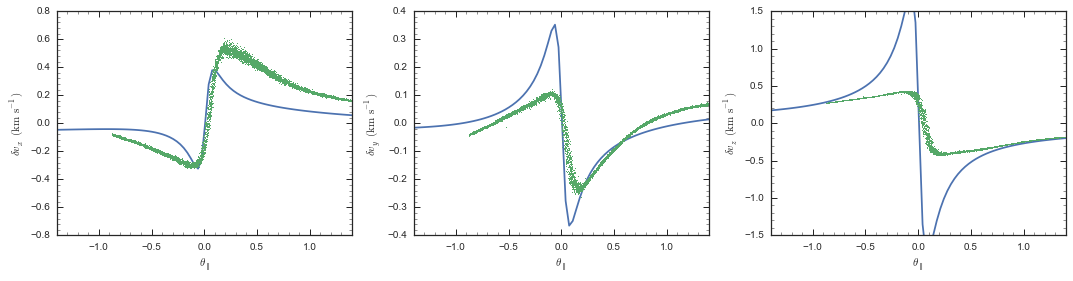

In [238]:
figsize(15,4)
subplot(1,3,1)
bovy_plot.bovy_plot(apar_gc+2.4,dv[:,0]*V0,
                    xrange=[-1.4,1.4],
                    yrange=[-.8,.8],
                    gcf=True,
                    xlabel=r'$\theta_\parallel$',
                    ylabel=r'$\delta v_x\,(\mathrm{km\,s}^{-1})$')
plot(apar[indx]+2.4,snapvdiff_dm0p25[indx,0],',',color=sns.color_palette()[1])
subplot(1,3,2)
bovy_plot.bovy_plot(apar_gc+2.4,dv[:,1]*V0,
                    xrange=[-1.4,1.4],
                    yrange=[-.4,.4],
                    gcf=True,
                    xlabel=r'$\theta_\parallel$',
                    ylabel=r'$\delta v_y\,(\mathrm{km\,s}^{-1})$')
plot(apar[indx]+2.4,snapvdiff_dm0p25[indx,1],',',color=sns.color_palette()[1])
subplot(1,3,3)
bovy_plot.bovy_plot(apar_gc+2.4,dv[:,2]*V0,
                    xrange=[-1.4,1.4],
                    yrange=[-1.5,1.5],
                    gcf=True,
                    xlabel=r'$\theta_\parallel$',
                    ylabel=r'$\delta v_z\,(\mathrm{km\,s}^{-1})$')
plot(apar[indx]+2.4,snapvdiff_dm0p25[indx,2],',',color=sns.color_palette()[1])
tight_layout()

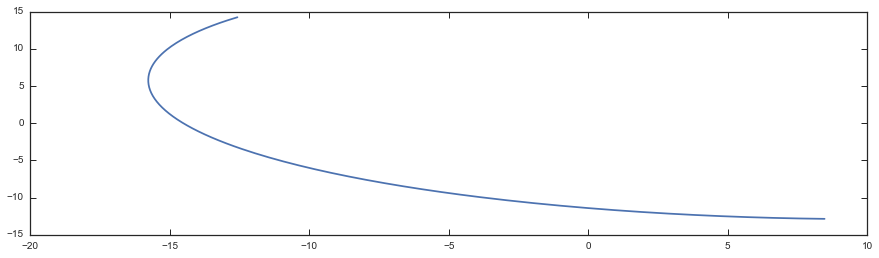

In [180]:
plot(x_gc[:,0]*R0,x_gc[:,2]*R0)

In [185]:
stream_orbit.vz()

0.87702795454545446